<a href="https://colab.research.google.com/github/TheBilalButt/Intern-at-DevelopersHub/blob/main/Week-04-SatelliteImageAnalysisforDeforestationMonitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # Upload your images (St1 and St2)


Saving St1.png to St1.png
Saving St2.png to St2.png


In [2]:
import os
os.listdir()  # List all files to verify if St1 and St2 are uploaded


['.config', 'St1.png', 'St2.png', 'sample_data']

Successfully loaded 'St1' image from /content/St1.png
Successfully loaded 'St2' image from /content/St2.png


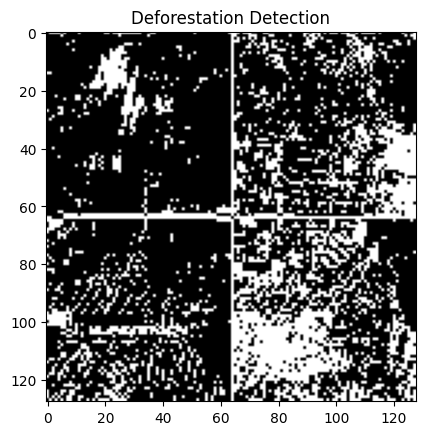

In [8]:
# STEP 1: IMPORT NECESSARY LIBRARIES
import cv2
import matplotlib.pyplot as plt

# STEP 2: VERIFY AND LOAD THE IMAGES (After upload)
image_before_path = '/content/St1.png'  # Path to the uploaded "St1.png" image (before deforestation)
image_after_path = '/content/St2.png'   # Path to the uploaded "St2.png" image (after deforestation)

# Read the images
image_before = cv2.imread(image_before_path)
image_after = cv2.imread(image_after_path)

# STEP 3: CHECK IF IMAGES WERE LOADED CORRECTLY
if image_before is None:
    print(f"Error: Failed to load image at {image_before_path}")
else:
    print(f"Successfully loaded 'St1' image from {image_before_path}")

if image_after is None:
    print(f"Error: Failed to load image at {image_after_path}")
else:
    print(f"Successfully loaded 'St2' image from {image_after_path}")

# STEP 4: RESIZE BOTH IMAGES TO THE SAME SIZE (128x128)
image_before_resized = cv2.resize(image_before, (128, 128))  # Resize to 128x128
image_after_resized = cv2.resize(image_after, (128, 128))    # Resize to 128x128

# STEP 5: IF BOTH IMAGES ARE LOADED, PROCEED WITH DEFORESTATION DETECTION
if image_before_resized is not None and image_after_resized is not None:
    # Convert to grayscale for difference computation
    gray_before = cv2.cvtColor(image_before_resized, cv2.COLOR_BGR2GRAY)
    gray_after = cv2.cvtColor(image_after_resized, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the two images
    difference = cv2.absdiff(gray_before, gray_after)

    # Apply thresholding to highlight significant changes (e.g., deforestation)
    _, threshold_diff = cv2.threshold(difference, 50, 255, cv2.THRESH_BINARY)

    # Show the result of deforestation detection
    plt.imshow(threshold_diff, cmap='gray')
    plt.title("Deforestation Detection")
    plt.show()


In [10]:
# Save the deforestation detection result as an image
output_path = '/content/deforestation_detection_result.png'
cv2.imwrite(output_path, threshold_diff)
print(f"Deforestation detection result saved at {output_path}")


Deforestation detection result saved at /content/deforestation_detection_result.png


In [13]:
# Count the number of white pixels in the thresholded image (indicating deforestation)
import numpy as np  # Import NumPy

deforestation_area = np.sum(threshold_diff == 255)
print(f"Deforestation area (in pixels): {deforestation_area}")


Deforestation area (in pixels): 4454


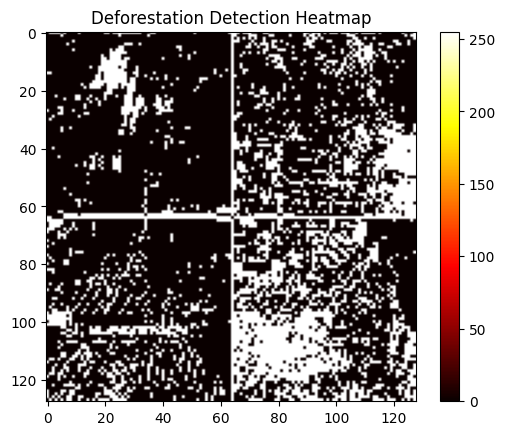

In [14]:
# Visualize the result as a heatmap
plt.imshow(threshold_diff, cmap='hot')  # 'hot' colormap for heatmap visualization
plt.colorbar()  # Show the color bar to represent the intensity of deforestation
plt.title("Deforestation Detection Heatmap")
plt.show()


Heatmap saved as 'deforestation_heatmap.png'


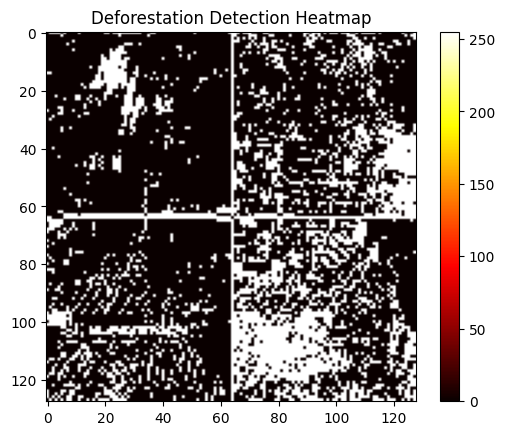

In [15]:
plt.imshow(threshold_diff, cmap='hot')
plt.colorbar()
plt.title("Deforestation Detection Heatmap")
plt.savefig('/content/deforestation_heatmap.png')  # Save heatmap as an image
print("Heatmap saved as 'deforestation_heatmap.png'")


In [16]:
deforestation_data = np.array(threshold_diff)
np.savetxt('/content/deforestation_data.csv', deforestation_data, delimiter=",")
print("Deforestation data saved as 'deforestation_data.csv'")


Deforestation data saved as 'deforestation_data.csv'


Successfully loaded 'St1' image from /content/St1.png
Successfully loaded 'St2' image from /content/St2.png


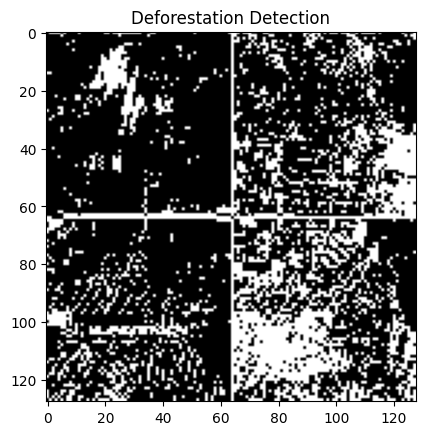

Deforestation area (in pixels): 4454


In [19]:
# STEP 1: IMPORT NECESSARY LIBRARIES
import cv2
import numpy as np
import matplotlib.pyplot as plt

# STEP 2: VERIFY AND LOAD THE IMAGES (After upload)
image_before_path = '/content/St1.png'  # Path to the uploaded "St1.png" image (before deforestation)
image_after_path = '/content/St2.png'   # Path to the uploaded "St2.png" image (after deforestation)

# Read the images
image_before = cv2.imread(image_before_path)
image_after = cv2.imread(image_after_path)

# STEP 3: CHECK IF IMAGES WERE LOADED CORRECTLY
if image_before is None:
    print(f"Error: Failed to load image at {image_before_path}")
else:
    print(f"Successfully loaded 'St1' image from {image_before_path}")

if image_after is None:
    print(f"Error: Failed to load image at {image_after_path}")
else:
    print(f"Successfully loaded 'St2' image from {image_after_path}")

# STEP 4: RESIZE BOTH IMAGES TO THE SAME SIZE (128x128) ONLY IF BOTH IMAGES ARE LOADED CORRECTLY
if image_before is not None and image_after is not None:
    image_before_resized = cv2.resize(image_before, (128, 128))  # Resize to 128x128
    image_after_resized = cv2.resize(image_after, (128, 128))    # Resize to 128x128

    # Convert to grayscale for difference computation
    gray_before = cv2.cvtColor(image_before_resized, cv2.COLOR_BGR2GRAY)
    gray_after = cv2.cvtColor(image_after_resized, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the two images
    difference = cv2.absdiff(gray_before, gray_after)

    # Apply thresholding to highlight significant changes (e.g., deforestation)
    _, threshold_diff = cv2.threshold(difference, 50, 255, cv2.THRESH_BINARY)

    # Show the result of deforestation detection
    plt.imshow(threshold_diff, cmap='gray')
    plt.title("Deforestation Detection")
    plt.show()

    # Count the number of white pixels in the thresholded image (indicating deforestation)
    deforestation_area = np.sum(threshold_diff == 255)
    print(f"Deforestation area (in pixels): {deforestation_area}")
